In [ ]:
case1 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.15, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/rerun/', prefix='curved_fixREtau_boundary_')
case1.tstart = 44

In [1]:
from ww.defs import Case, Interface2D
import numpy as np
from ww.prepare import read_p, read_fields
from ww.phase import extract_phase
import os
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd

%load_ext autoreload
%autoreload 3

In [2]:
case_pre1 = Case(ustar=0.25, Retau=720, Bo=None, g=None, ak=0.2, LEVEL=10, emax=0.3, OUTLEVEL=9, PRECURSOR=True,
                 working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_precursor_')
case_pre1.tstart = 53

In [13]:
case = case_pre1

case.tsimu = np.arange(53,64)
extract_phase(case, case.tsimu, PRE=True)
case.field_t = np.arange(53,64) - case.tstart
read_fields(case)

pickle restored!


  0%|          | 0/11 [00:00<?, ?it/s]

53
pickle restored!
pickle restored!
pickle restored!


  9%|▉         | 1/11 [00:06<01:02,  6.25s/it]

54
pickle restored!
pickle restored!
pickle restored!


 18%|█▊        | 2/11 [00:17<01:22,  9.17s/it]

55
pickle restored!
pickle restored!
pickle restored!


 27%|██▋       | 3/11 [00:28<01:20, 10.11s/it]

56
pickle restored!
pickle restored!
pickle restored!


 36%|███▋      | 4/11 [00:39<01:13, 10.52s/it]

57
pickle restored!
pickle restored!
pickle restored!


 45%|████▌     | 5/11 [00:51<01:05, 10.85s/it]

58
pickle restored!
pickle restored!
pickle restored!


 55%|█████▍    | 6/11 [01:02<00:55, 11.02s/it]

59
pickle restored!
pickle restored!
pickle restored!


 64%|██████▎   | 7/11 [01:13<00:44, 11.09s/it]

60
pickle restored!
pickle restored!
pickle restored!


 73%|███████▎  | 8/11 [01:24<00:33, 11.10s/it]

61
pickle restored!
pickle restored!
pickle restored!


 82%|████████▏ | 9/11 [01:36<00:22, 11.14s/it]

62
pickle restored!
pickle restored!
pickle restored!


 91%|█████████ | 10/11 [01:47<00:11, 11.20s/it]

63
pickle restored!
pickle restored!
pickle restored!


100%|██████████| 11/11 [01:59<00:00, 10.82s/it]


In [5]:
"""NOTICE: to accomodate different pickle versions"""
from ww.prepare import load_object

case = case_pre1
ux_3D = {'name':'ux', 'value':[]}
field = ux_3D
tsimu = 60

picklename = case.path + 'field/' + 'pickle_tiger/' + field['name'] +'_t%g' % tsimu +'.pkl'
exists = os.path.exists(picklename)
# If the pickle is there read in the pickles
if exists:
    field['value'] = load_object(picklename)
    print('pickle restored!')

pickle restored!


In [15]:
# ux_3D['value'].shape is (255, 512, 512) instead of (256, 512, 512) because in the original code I wrote 
# double zslice = -L0/2+L0/2./Nslice;
# for (int i=0; i<Nslice; i++) {
#     zslice += L0/Nslice;
#     sprintf (filename, "./field/ux_t%g_slice%d", t, i);
#     sliceXY (filename,u.x,zslice,9);
#     sprintf (filename, "./field/uy_t%g_slice%d", t, i);
#     sliceXY (filename,u.y,zslice,9);
#     sprintf (filename, "./field/f_t%g_slice%d", t, i);
#     sliceXY (filename,f,zslice,9);
# }
# which messed up the indexing...
# Notice how zslice += L0/Nslice is misplaced...

ux_sub = ux_3D['value'][::2, :, :]

In [31]:
# Example 3D xarray DataArray
x = np.linspace(-np.pi, np.pi, 512, endpoint=False) + 2*np.pi/512/2
y = np.linspace(0, 2*np.pi, 512, endpoint=False) + 2*np.pi/512/2
z = np.linspace(-np.pi, np.pi, 128, endpoint=False) + 2*np.pi/128/2

data = ux_3D['value'][::2, :, :]  # Example data
da = xr.DataArray(data, dims=['z', 'x', 'y'], coords={'x': x, 'y': y, 'z': z})

In [33]:
# Convert xarray DataArray to pandas DataFrame
df = da.to_dataframe(name='ux').reset_index()

# Save DataFrame to CSV in x, y, z, value format
csv_filename = 'data_xyz_ux.csv'
df.to_csv(csv_filename, index=False)

,z,x,y,ux
0,-3.117049,-3.135457,0.006136,0.0000
1,-3.117049,-3.135457,0.018408,0.0000
2,-3.117049,-3.135457,0.030680,0.0000
3,-3.117049,-3.135457,0.042951,0.0000
4,-3.117049,-3.135457,0.055223,0.0000
...,...,...,...,...
33554427,3.117049,3.135457,6.227962,5.3049
33554428,3.117049,3.135457,6.240234,5.3049
33554429,3.117049,3.135457,6.252506,5.3049
33554430,3.117049,3.135457,6.264778,5.3049


In [34]:
512*512*128

33554432

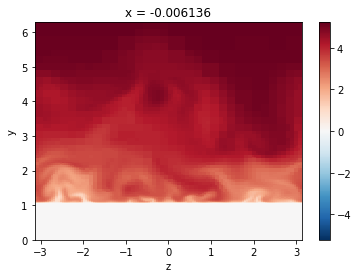

In [30]:
data_array.sel(x=0, method='nearest').plot(x="z",y="y")

In [12]:
x = np.linspace(-np.pi, np.pi, 512, endpoint=False) + 2*np.pi/512/2
y = np.linspace(0, 2*np.pi, 512, endpoint=False) + 2*np.pi/512/2
z = np.linspace(-np.pi, np.pi, 128, endpoint=False) + 2*np.pi/128/2

In [ ]:
import os

# Specify the path of the file
file_path = '/path/to/your/file.ext'

# Check if the file exists
if os.path.exists(file_path):
    print(f"File '{file_path}' exists.")
else:
    print(f"File '{file_path}' does not exist.")